In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# this stores the plots in the notebook document.
%matplotlib inline

# warnings supression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# unzip data
!unzip data.zip

Archive:  data.zip
replace data/abalone.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [3]:
# read in cars dataset and mark all questionmarks as NaNs.
cars = pd.read_csv("data/cars_multivariate.csv",
                  na_values='?')
cars.head(n=2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320


In [4]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


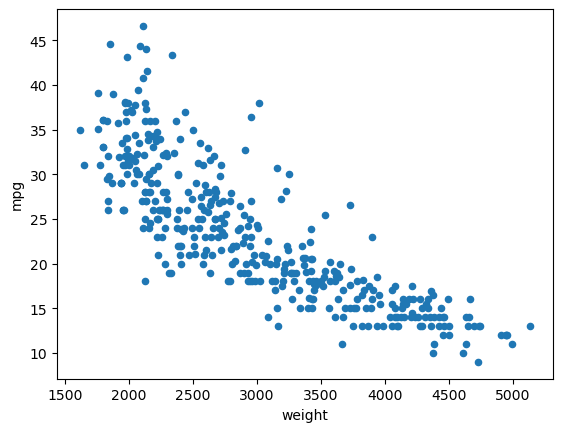

In [5]:
# Plot the variables
cars.plot(x='weight', 
          y='mpg', 
          kind='scatter');

In [6]:
# Function that returns slope and intercept
def get_line_equation(p1, p2):
    m = (p2[1] - p1[1]) / (p2[0] - p1[0]) # Slope y1-y2/x1-x2
    b = p1[1] - m * p1[0] # Intercept
    return  m, b

In [7]:
car1 = [cars.weight[0], cars.mpg[0]]
car2 = [cars.weight[1], cars.mpg[1]]

print(f'point 1:{car1}, point 2:{car2}')

point 1:[3504.0, 18.0], point 2:[3693.0, 15.0]


In [8]:
slope, intercept = get_line_equation(p1=car1, p2=car2)

print(f'intercept: {intercept}, slope: {slope}')

intercept: 73.61904761904762, slope: -0.015873015873015872


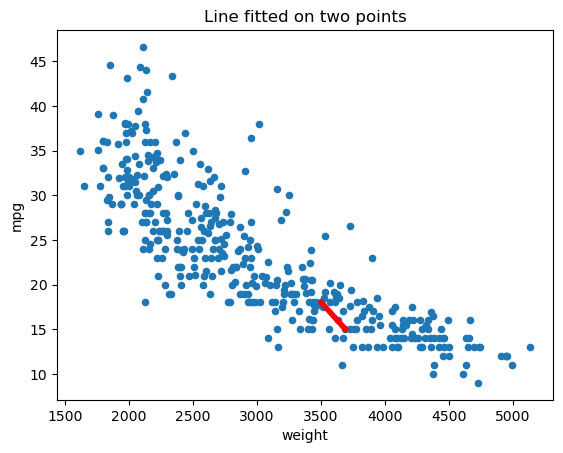

In [9]:
# plot the scatterplot again 
fig = cars.plot(x='weight', 
                y='mpg', 
                kind='scatter')

# plot the line between the two points
plt.plot([car1[0], car2[0]], [car1[1], car2[1]], color="red", linewidth=4)

# plot a title
plt.title("Line fitted on two points");

In [14]:
# import the statsmodels.api module
import statsmodels.api as sm

In [15]:
# Choose the independent variable, the predictor X
X = cars[['weight']]

# Define dependent variable
y = cars.mpg

display(X.head())
display(y.head())

,weight
0,3504.0
1,3693.0
2,3436.0
3,3433.0
4,3449.0


0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [16]:
# Since statsmodel OLS model needs an adjustable intercept, we add a column of 1s to:
X = sm.add_constant(X)
display(X.head())

,const,weight
0,1.0,3504.0
1,1.0,3693.0
2,1.0,3436.0
3,1.0,3433.0
4,1.0,3449.0


In [17]:
# create an OLS model
our_model = sm.OLS(y, X)

# use the data to calculate the intercept and slope
model_results = our_model.fit()

# return the output of the model
model_results.summary() # summary contains eg. 'const' (intercept) and 'slope' of the regression equation.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Tue, 18 Jul 2023   Prob (F-statistic):          6.02e-102
Time:                        13:38:56   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# print out the intercept and slope of model by addressing the parameters via ".params"
intercept, slope = model_results.params

print(f'intercept: {intercept}, slope: {slope}')

intercept: 46.216524549017585, slope: -0.0076473425357795775


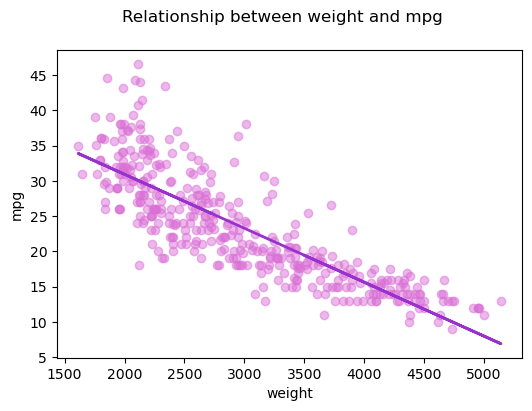

In [20]:
# Plotting the results of model
fig, ax = plt.subplots(figsize=(6, 4))

x = cars['weight']
y = cars['mpg']

# add data points
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Relationship between weight and mpg')

# plotting the regression line with the help of calculated intercept and slope variables
ax.plot(x, x*slope+intercept, '-', color='darkorchid', linewidth=2);
ax.set_ylabel("mpg");
ax.set_xlabel("weight");

In [23]:
cars.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
128,26.0,4,122.0,80.0,2451.0,16.5,74,1,ford pinto


In [24]:
x_horse = cars[['horsepower']]

In [25]:
x_horse = sm.add_constant(x_horse)
display(x_horse.head())

,const,horsepower
0,1.0,130.0
1,1.0,165.0
2,1.0,150.0
3,1.0,150.0
4,1.0,140.0


In [26]:
h_our_model = sm.OLS(y, x_horse)

# use the data to calculate the intercept and slope
h_model_results = h_our_model.fit()

# return the output of the model
h_model_results.summary() # summary contains eg. 'const' (intercept) and 'slope' of the regression equation.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 18 Jul 2023   Prob (F-statistic):           7.03e-81
Time:                        15:39:23   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

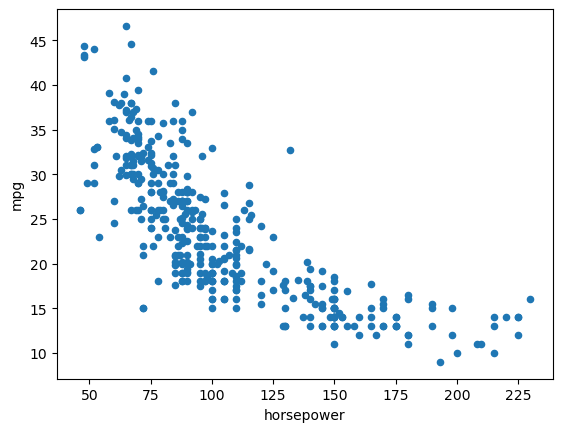

In [27]:
# Plot the variables of interest first
cars.plot(x='horsepower', 
          y='mpg', 
          kind='scatter');

In [28]:
intercept_hp, slope_hp = h_model_results.params

print(f'intercept: {intercept_hp}, slope: {slope_hp}')

intercept: 39.935861021170474, slope: -0.15784473335365362


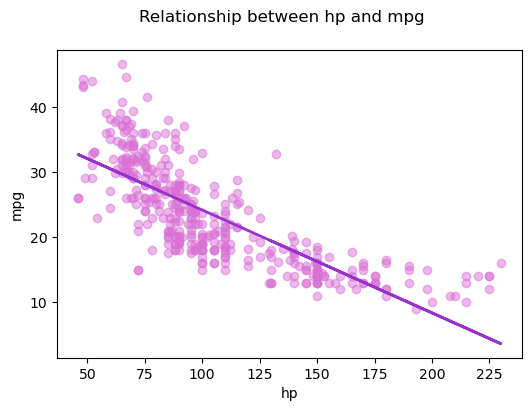

In [29]:
# Plotting the results of model
fig, ax = plt.subplots(figsize=(6, 4))

x = cars['horsepower']
y = cars['mpg']

# add data points
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Relationship between hp and mpg')

# plotting the regression line with the help of calculated intercept and slope variables
ax.plot(x, x*slope_hp+intercept_hp, '-', color='darkorchid', linewidth=2);
ax.set_ylabel("mpg");
ax.set_xlabel("hp");

In [21]:
# Choose the independent variable, the predictor X
x_brk = cars[['weight']]

# Define dependent variable (since it's always a single variable, we can use dot notation here)
y_brk = cars.mpg

In [22]:
# create an OLS model
my_personal_model = sm.OLS(y_brk, x_brk)

# use the data to calculate the intercept and slope
my_model_results = my_personal_model.fit()

# return the output of the model
my_model_results.summary() # summary contains eg. 'const' (intercept) and 'slope' of the regression equation.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.707
Model:                            OLS   Adj. R-squared (uncentered):              0.706
Method:                 Least Squares   F-statistic:                              942.2
Date:                Tue, 18 Jul 2023   Prob (F-statistic):                   3.40e-106
Time:                        15:34:25   Log-Likelihood:                         -1573.0
No. Observations:                 392   AIC:                                      3148.
Df Residuals:                     391   BIC:                                      3152.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
weight         0.0067      0.000     30.696      0.000       0.006       0.007
==============================================================================
Omnibus:                       61.704   Durbin-Watson:                   0.480
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.054
Skew:                          -0.039   Prob(JB):                     0.000538
Kurtosis:                       2.043   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Summary

- Linear regression is finding the best fit line to data
- Simple linear regression is 1 outcome/dependent and 1 explanatory/independent variable
- Linear regression can prove a relationship, but it **cannot prove causality**
- Ordinary Least Squares (OLS) is the fitting algorithm, which mathematically finds the best fitting line to data
- $\textbf{R}^2$ is the proportion of the variation explained by the model

Useful resource: [realpython.com: Linear Regression](https://realpython.com/linear-regression-in-python/)